In [1]:
from src.post_processing import PathWrangler
from src.config import filepaths
from IPython.display import display, SVG
import numpy as np
import matplotlib.pyplot as plt

Initialize PathWrangler object

In [3]:
path_filepath = filepaths['processed_expansions'] / 'found_paths.json'
predicted_reactions_filepath = filepaths['processed_expansions'] / "predicted_reactions.json"
known_reactions_filepath = filepaths['processed_expansions'] / "known_reactions.json"

pw = PathWrangler(
    path_filepath=path_filepath,
    pr_filepath=predicted_reactions_filepath,
    kr_filepath=known_reactions_filepath
)

Display set of available starter target pairs

In [4]:
pw.starter_targets

(('alpha_ketoglutarate', 'hopa'),)

Get all paths available

In [5]:
all_paths = pw.get_paths()
print(f"There are {len(all_paths)} total paths")

There are 6 total paths


Filter and sort paths

In [6]:
starters = ['alpha_ketoglutarate', 'succinate'] # Starters of interest
targets = ['hopa'] # Targets of interest
filter_by_enzymes = {'existence': ['protein']} # Only paths w/ enzymes w/ protein-level evidence
sort_by = 'mean_rcmcs' # Sort paths by their average reaction-center MCS

filtered_sorted_paths = pw.get_paths(
    starters=starters,
    targets=targets,
    filter_by_enzymes=filter_by_enzymes,
    sort_by=sort_by
)
print(f"There are {len(filtered_sorted_paths)} paths after filtering")

There are 6 paths after filtering


Look at path-level info

In [7]:
best_path = filtered_sorted_paths[0]
print(f"Best path has {len(best_path.reactions)} reactions")
print(f"Min RCMCS: {best_path.min_rcmcs}, Mean RCMCS: {best_path.mean_rcmcs}")


Best path has 2 reactions
Min RCMCS: 0.9473684210526315, Mean RCMCS: 0.9736842105263157


Look at info on the predicted reactions

Reaction #1. Best RCMCS: [1.0]


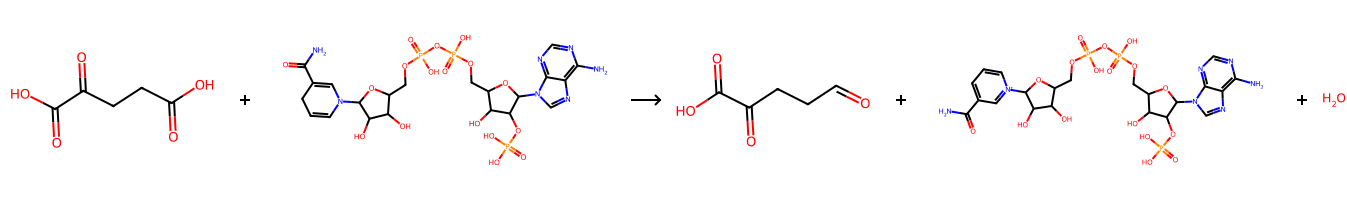

Reaction #2. Best RCMCS: [0.9473684210526315]


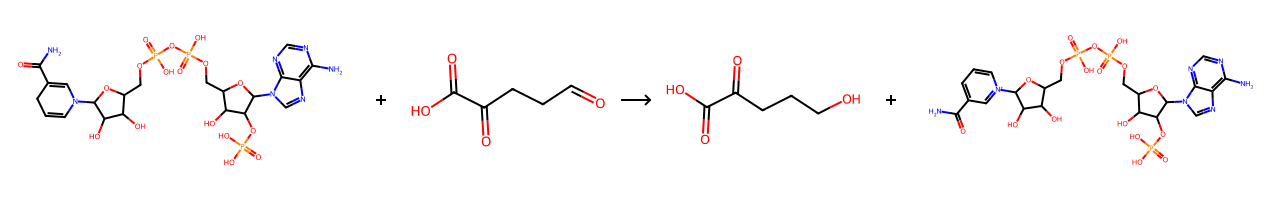

In [8]:
rxn1, rxn2 = best_path.reactions
print(f"Reaction #1. Best RCMCS: {rxn1.top_rcmcs(k=1)}")
display(SVG(rxn1.image))

print(f"Reaction #2. Best RCMCS: {rxn2.top_rcmcs(k=1)}")
display(SVG(rxn2.image))

Examine known reaction analogues

The first reaction has 2 known analogues


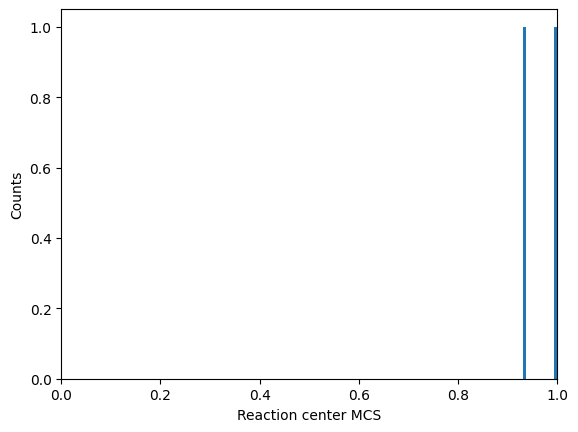

Predicted reaction #1


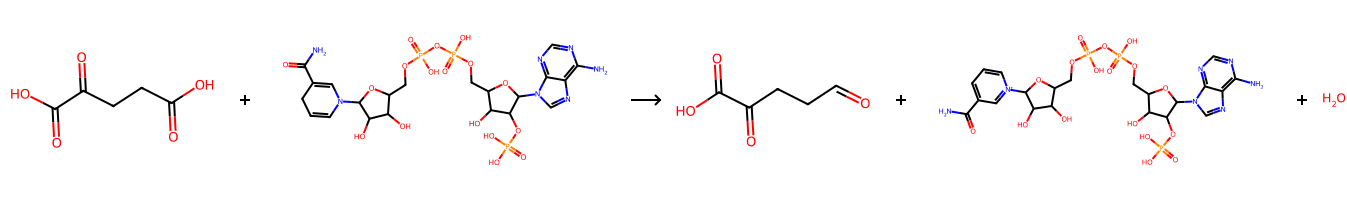

Closest known analogue


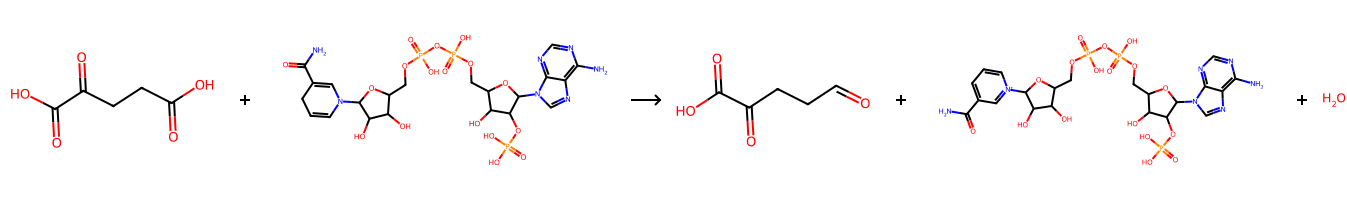

In [9]:
print(f"The first reaction has {len(rxn1.analogues)} known analogues")
rcmcses = rxn1.top_rcmcs(k=100)

# Histogram of rcmcses
plt.hist(rcmcses)
plt.xlim(0, 1)
plt.ylabel('Counts')
plt.xlabel('Reaction center MCS')
plt.show()

closest_known = rxn1.top_analogues(k=1)[0]
print("Predicted reaction #1")
display(SVG(rxn1.image))

print("Closest known analogue")
display(SVG(closest_known.image))

Pull info on enzymes

In [10]:
print(f"Analogue has {len(closest_known.enzymes)} enzymes validated up to the {list(filter_by_enzymes.values())} level")

organisms = set()
for e in closest_known.enzymes:
    organisms.add(e.organism)

print(f"Enzymes are found across organisms: {organisms}")
print(f"Enzyme UniProt IDs are available: {[e.uniprot_id for e in closest_known.enzymes]}")

Analogue has 7 enzymes validated up to the [['Evidence at protein level']] level
Enzymes are found across organisms: {'Saccharolobus solfataricus (strain ATCC 35092 / DSM 1617 / JCM 11322 / P2) (Sulfolobus solfataricus)', 'Haloferax volcanii (strain ATCC 29605 / DSM 3757 / JCM 8879 / NBRC 14742 / NCIMB 2012 / VKM B-1768 / DS2) (Halobacterium volcanii)', 'Bacillus subtilis (strain 168)', 'Azospirillum brasilense', 'Acinetobacter baylyi (strain ATCC 33305 / BD413 / ADP1)'}
Enzyme UniProt IDs are available: ['Q08IC0', 'D4GP41', 'Q97UA1', 'Q1JUP4', 'P42236', 'Q6FFQ0', 'Q08IB7']


Finally, can access known reactions on database where they came from

In [11]:
closest_known.db_entries

[DatabaseEntry(name='rhea', id=11298)]

In [12]:
%gui asyncio

In [13]:
import asyncio
from ipywidgets import IntSlider, Output

slider = IntSlider()
out = Output()

def wait_for_change(widget, value):
    future = asyncio.Future()
    def getvalue(change):
        # make the new value available
        future.set_result(change.new)
        widget.unobserve(getvalue, value)
    widget.observe(getvalue, value)
    return future

async def f():
    for i in range(10):
        out.append_stdout('did work ' + str(i) + '\n')
        x = await wait_for_change(slider, 'value')
        out.append_stdout('async function continued with value ' + str(x) + '\n')
asyncio.ensure_future(f())

slider

2+2

4